In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [2]:
ice_cream_interest=pd.read_csv('ice_cream_interest.csv')
ice_cream_interest

,month,interest
0,2004-01,13
1,2004-02,15
2,2004-03,17
3,2004-04,19
4,2004-05,22
...,...,...
195,2020-04,55
196,2020-05,71
197,2020-06,81
198,2020-07,90


In [3]:
ice_cream_interest['month']=pd.to_datetime(ice_cream_interest.month)
ice_cream_interest.set_index('month',inplace=True)
ice_cream_interest=ice_cream_interest.asfreq(pd.infer_freq(ice_cream_interest.index))
ice_cream_interest

,interest
month,
2004-01-01,13
2004-02-01,15
2004-03-01,17
2004-04-01,19
2004-05-01,22
...,...
2020-04-01,55
2020-05-01,71
2020-06-01,81


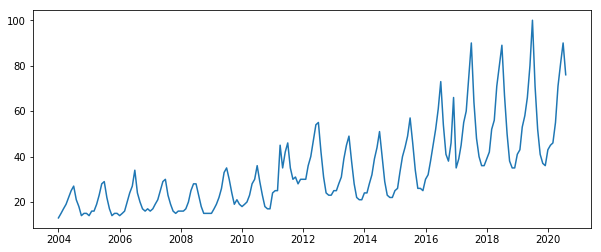

In [4]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest);

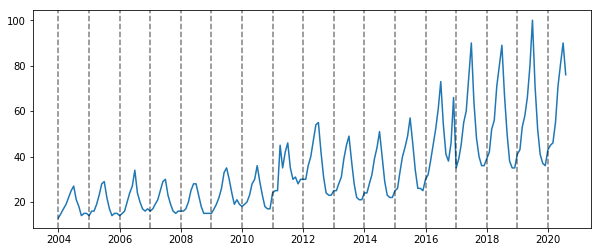

In [5]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest)
for year in range(2004,2021):
    plt.axvline(datetime(year,1,1),color='k',linestyle='--',alpha=0.5)

In [6]:
stl=STL(ice_cream_interest)
result=stl.fit()

In [7]:
seasonal,trend,resid=result.seasonal,result.trend,result.resid

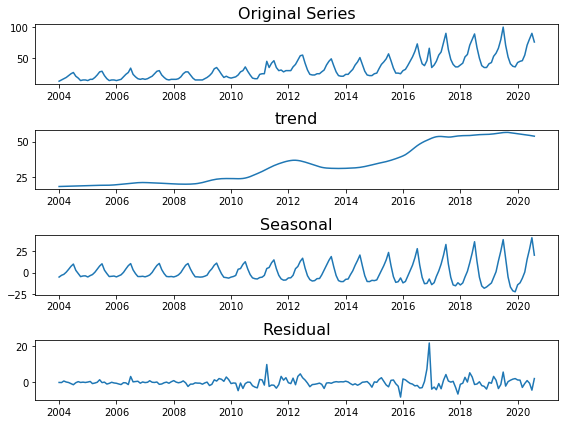

In [8]:
plt.figure(figsize=(8,6))
plt.subplot(4,1,1)
plt.plot(ice_cream_interest)
plt.title('Original Series',fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('trend',fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal',fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual',fontsize=16)

plt.tight_layout()

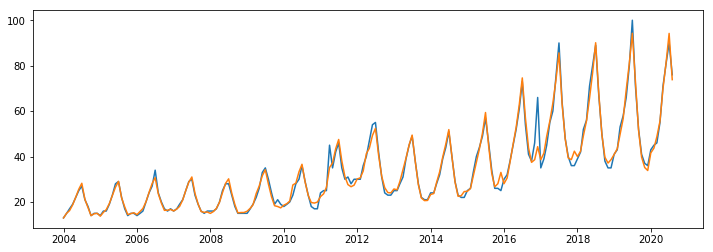

In [9]:
estimated=trend+seasonal
plt.figure(figsize=(12,4))
plt.plot(ice_cream_interest)
plt.plot(estimated)

In [10]:
resid_mu=resid.mean()
resid_dev=resid.std()

lower=resid_mu-3*resid_dev
upper=resid_mu+3*resid_dev

(731459.0, 737760.0)

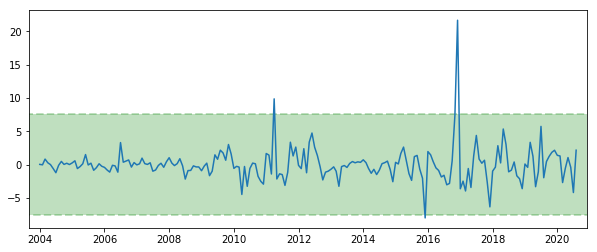

In [11]:
plt.figure(figsize=(10,4))
plt.plot(resid)

plt.fill_between([datetime(2003,1,1),datetime(2021,8,1)],lower,upper,color='g',alpha=0.25,linestyle='--', linewidth=2)
plt.xlim(datetime(2003,9,1), datetime(2020,12,1))

In [12]:
anomalies = ice_cream_interest[(resid < lower) | (resid > upper)]

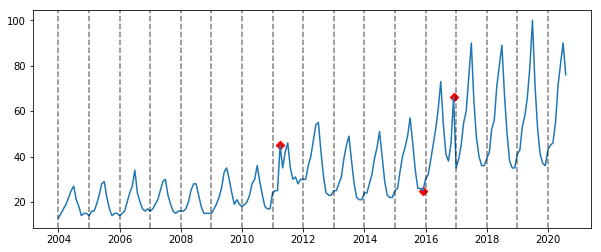

In [13]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest)
for year in range(2004,2021):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)
    
plt.scatter(anomalies.index, anomalies.interest, color='r', marker='D')

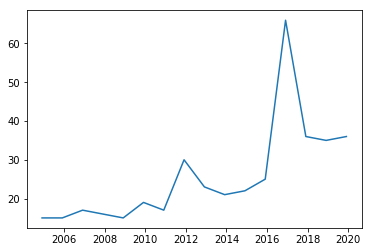

In [14]:
anomalies
plt.plot(ice_cream_interest[ice_cream_interest.index.month==12])

In [15]:
ice_cream_interest1=ice_cream_interest.copy()
for i in range(len(anomalies)):
    ice_cream_interest1['interest'].loc[anomalies.index[i]]=np.nan
    ice_cream_interest1=ice_cream_interest1.interpolate()

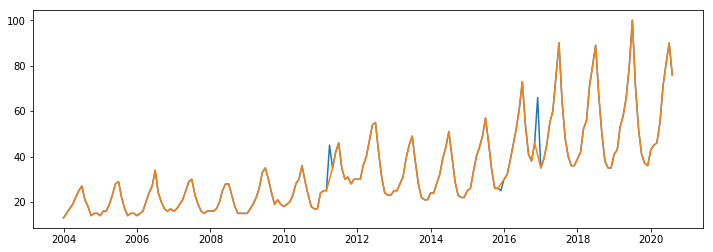

In [16]:
plt.figure(figsize=(12,4))
plt.plot(ice_cream_interest)
plt.plot(ice_cream_interest1)